<a href="https://colab.research.google.com/github/ericasilva1994/ibovespa-dataset/blob/main/notebooktesteibovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Análise Exploratória de Dados (EDA) - Ibovespa com Indicadores Técnicos

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [38]:
# Carregar os dado
url= 'https://raw.githubusercontent.com/ericasilva1994/ibovespa-dataset/main/dados%20Ibovespa%20_20anos.xlsx'
df = pd.read_excel(url)

In [39]:
# Padronizar colunas
colunas_numericas = ['Último', 'Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.']

In [40]:
def clean(x):
    return float(str(x).replace('.', '').replace(',', '.').replace('%', '').replace('B', 'e9').replace('M', 'e6').replace('K', 'e3'))

for col in colunas_numericas:
    df[col] = df[col].apply(clean)

In [41]:
def clean(x):
    return float(str(x).replace('.', '').replace(',', '.').replace('%', ''))

In [42]:
def clean(x):
    return float(str(x).replace('.', '').replace(',', '.').replace('%', ''))

In [43]:
# Tendência (1 = alta no próximo dia)
df['Tendencia'] = (df['Último'].shift(-1) > df['Último']).astype(int)

In [44]:
# =====================
# Indicadores Técnicos
# =====================

# Médias móveis simples
for window in [5, 10, 20]:
    df[f'SMA_{window}'] = df['Último'].rolling(window=window).mean()

In [45]:
# RSI (Relative Strength Index)
window_length = 14
delta = df['Último'].diff()
gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

gain = pd.Series(gain).rolling(window=window_length).mean()
loss = pd.Series(loss).rolling(window=window_length).mean()
rs = gain / loss
df['RSI'] = 100 - (100 / (1 + rs))

In [46]:
# Bandas de Bollinger
df['BB_Middle'] = df['Último'].rolling(window=20).mean()
df['BB_Std'] = df['Último'].rolling(window=20).std()
df['BB_Upper'] = df['BB_Middle'] + (2 * df['BB_Std'])
df['BB_Lower'] = df['BB_Middle'] - (2 * df['BB_Std'])


In [47]:
# =====================
# Visualizações
# =====================

# 1. Resumo estatístico
print("Resumo estatístico das variáveis:")
print(df.describe())

Resumo estatístico das variáveis:
                                Data         Último       Abertura  \
count                           4975    4975.000000    4975.000000   
mean   2015-07-15 03:49:31.899497216   74956.123417   74934.830754   
min              2005-06-27 00:00:00   24423.000000   24425.000000   
25%              2010-07-07 12:00:00   52813.500000   52812.000000   
50%              2015-07-16 00:00:00   64477.000000   64475.000000   
75%              2020-07-27 12:00:00  102966.000000  102947.000000   
max              2025-07-25 00:00:00  141264.000000  141265.000000   
std                              NaN   29722.988684   29719.909099   

              Máxima         Mínima          Vol.         Var%    Tendencia  \
count    4975.000000    4975.000000  4.974000e+03  4975.000000  4975.000000   
mean    75644.484623   74235.104121  2.953794e+08     4.227538     0.480402   
min     24603.000000   24192.000000  1.121000e+05 -1478.000000     0.000000   
25%     53371.00000

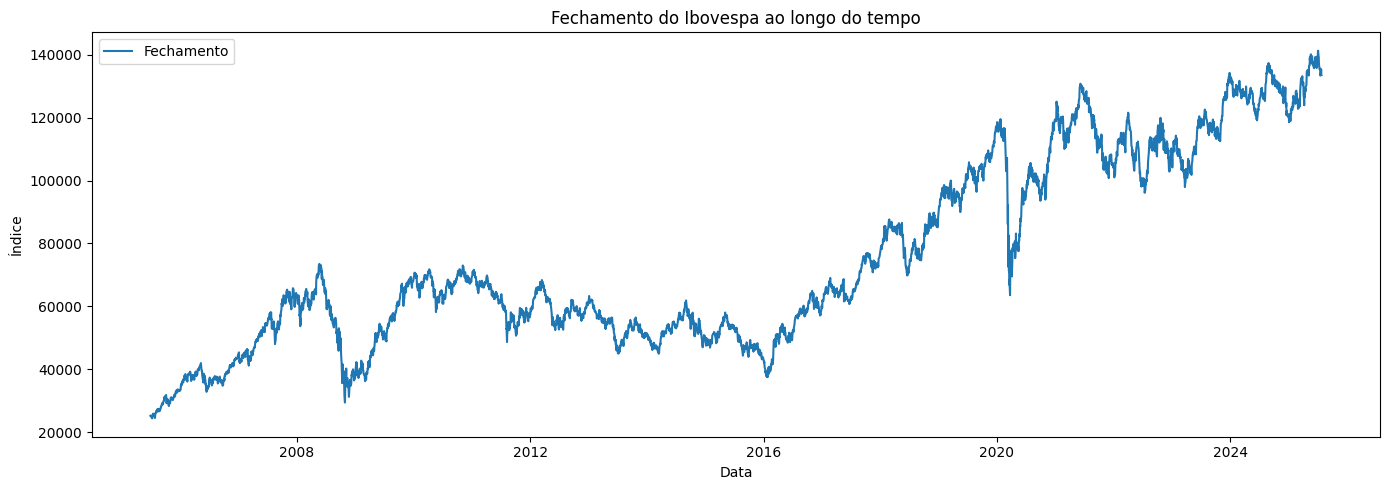

In [48]:
# 2. Linha do tempo do fechamento
plt.figure(figsize=(14, 5))
plt.plot(df['Data'], df['Último'], label='Fechamento')
plt.title("Fechamento do Ibovespa ao longo do tempo")
plt.xlabel("Data")
plt.ylabel("Índice")
plt.legend()
plt.tight_layout()
plt.show()

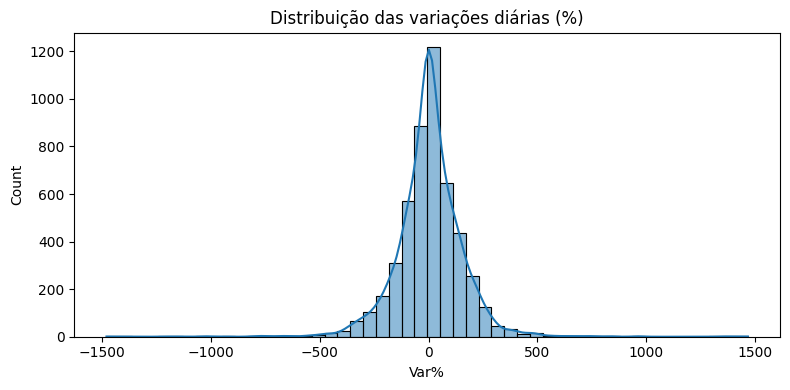

In [49]:
# 3. Histograma de variações
plt.figure(figsize=(8, 4))
sns.histplot(df['Var%'], bins=50, kde=True)
plt.title("Distribuição das variações diárias (%)")
plt.xlabel("Var%")
plt.tight_layout()
plt.show()

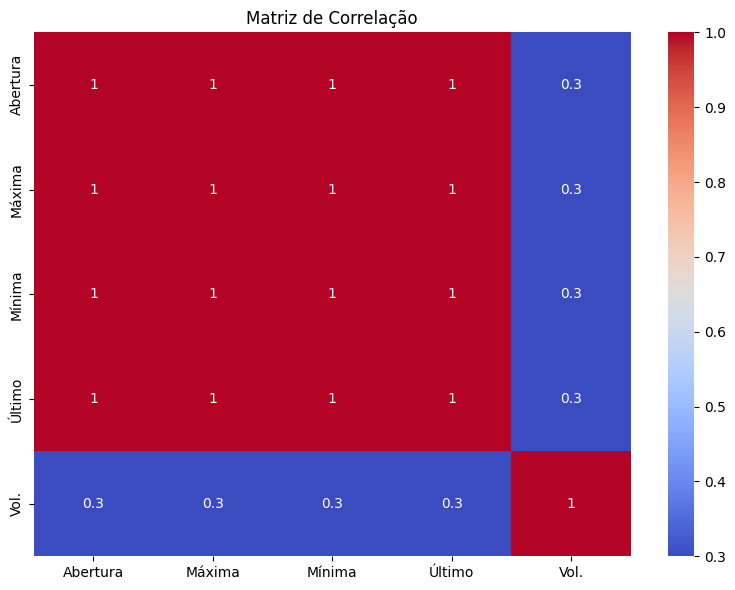

In [50]:
# 4. Matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Abertura', 'Máxima', 'Mínima', 'Último', 'Vol.']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

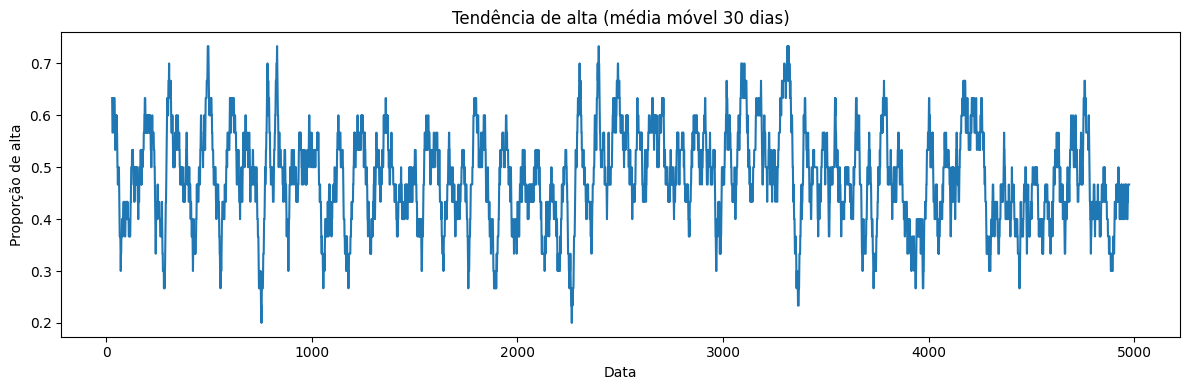

In [51]:
# 5. Tendência média móvel de 30 dias
plt.figure(figsize=(12, 4))
df['Tendencia'].rolling(30).mean().plot()
plt.title("Tendência de alta (média móvel 30 dias)")
plt.xlabel("Data")
plt.ylabel("Proporção de alta")
plt.tight_layout()
plt.show()


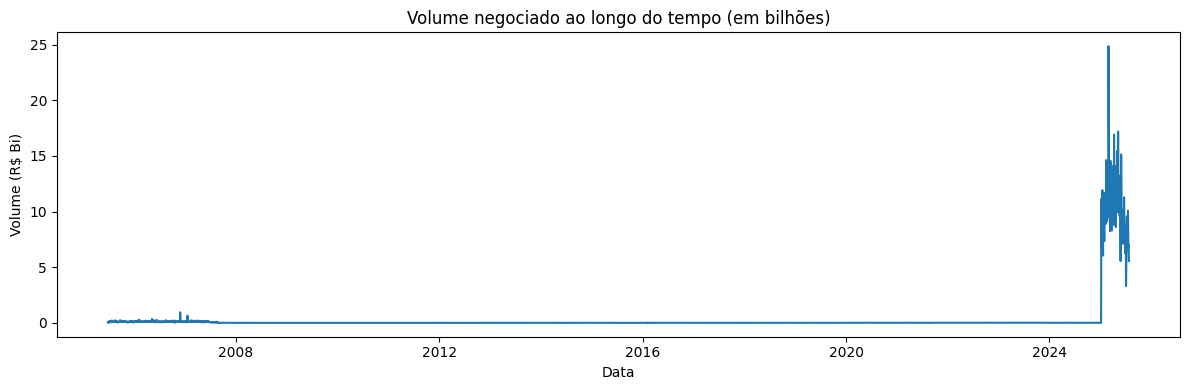

In [52]:
# 6. Volume negociado
plt.figure(figsize=(12, 4))
plt.plot(df['Data'], df['Vol.'] / 1e9)
plt.title("Volume negociado ao longo do tempo (em bilhões)")
plt.xlabel("Data")
plt.ylabel("Volume (R$ Bi)")
plt.tight_layout()
plt.show()

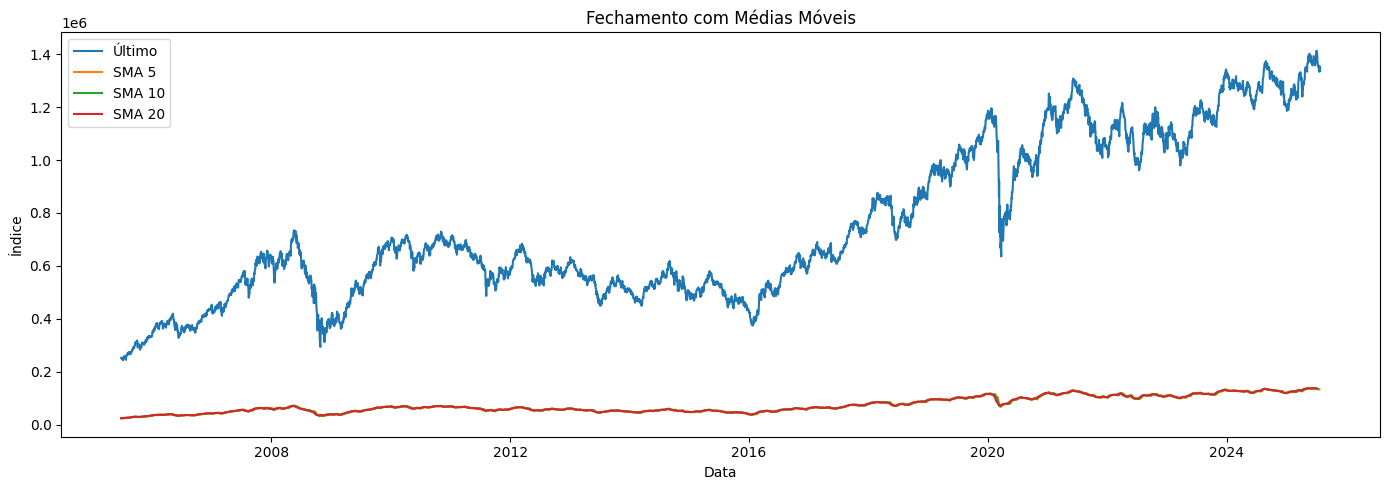

In [26]:
# 7. Médias móveis
plt.figure(figsize=(14, 5))
plt.plot(df['Data'], df['Último'], label='Último')
plt.plot(df['Data'], df['SMA_5'], label='SMA 5')
plt.plot(df['Data'], df['SMA_10'], label='SMA 10')
plt.plot(df['Data'], df['SMA_20'], label='SMA 20')
plt.title("Fechamento com Médias Móveis")
plt.xlabel("Data")
plt.ylabel("Índice")
plt.legend()
plt.tight_layout()
plt.show()

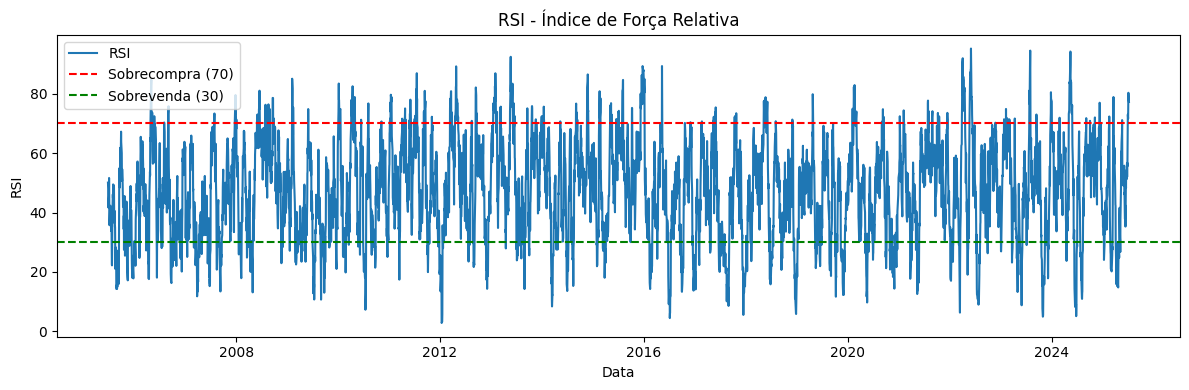

In [53]:
# 8. RSI
plt.figure(figsize=(12, 4))
plt.plot(df['Data'], df['RSI'], label='RSI')
plt.axhline(70, color='r', linestyle='--', label='Sobrecompra (70)')
plt.axhline(30, color='g', linestyle='--', label='Sobrevenda (30)')
plt.title("RSI - Índice de Força Relativa")
plt.xlabel("Data")
plt.ylabel("RSI")
plt.legend()
plt.tight_layout()
plt.show()

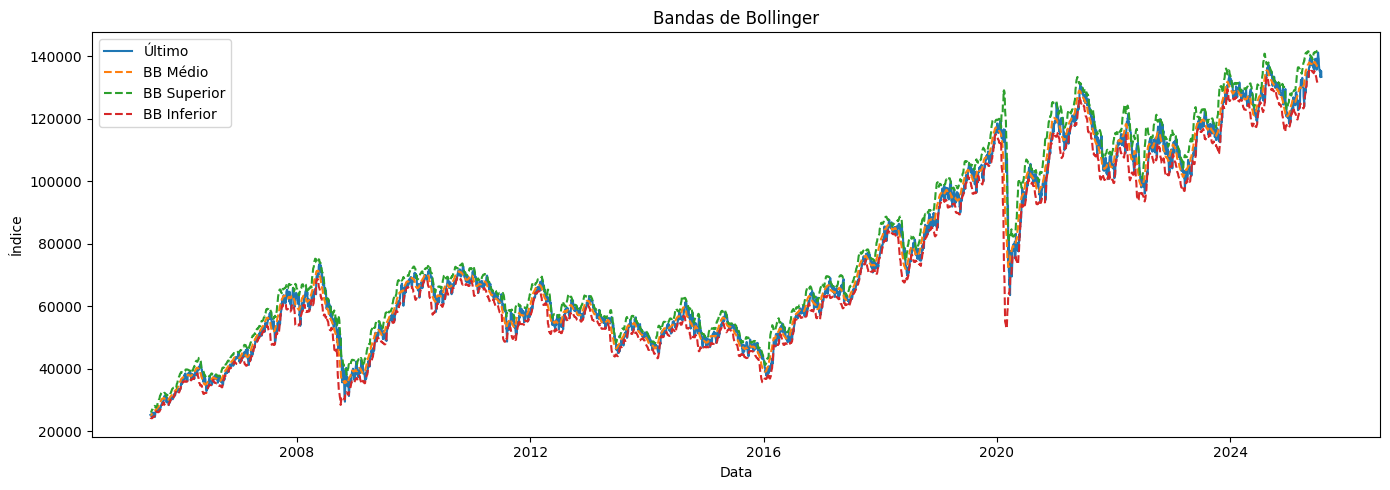

In [54]:
# 9. Bandas de Bollinger
plt.figure(figsize=(14, 5))
plt.plot(df['Data'], df['Último'], label='Último')
plt.plot(df['Data'], df['BB_Middle'], label='BB Médio', linestyle='--')
plt.plot(df['Data'], df['BB_Upper'], label='BB Superior', linestyle='--')
plt.plot(df['Data'], df['BB_Lower'], label='BB Inferior', linestyle='--')
plt.title("Bandas de Bollinger")
plt.xlabel("Data")
plt.ylabel("Índice")
plt.legend()
plt.tight_layout()
plt.show()
